In [1]:
"""
Author: Phillip Kearns
Nearest Subspace Classifier demo - Classifydigits
python version: 3.7.2
"""
import numpy as np
import scipy.linalg as lin
from scipy.io import loadmat
import matplotlib.pyplot as plt
from trainUoS import trainUoS
from nsClassify import nsClassify
from sklearn.metrics import accuracy_score

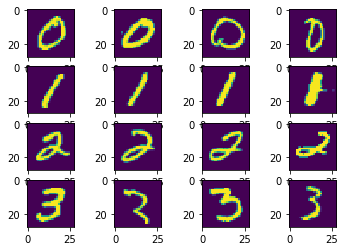

In [2]:
# Load data: 
data = loadmat("mnistSubset.mat")
X = data['X']
trueLabels = data['trueLabels'] - 1

# Plot a few exmaples from the first 4 classes
jj = 0
for ii in range(16):
    plt.subplot(4,4,ii+1)
    X_1 = X[:,jj].reshape(28,28)
    plt.imshow(X_1.T)
    jj += 50

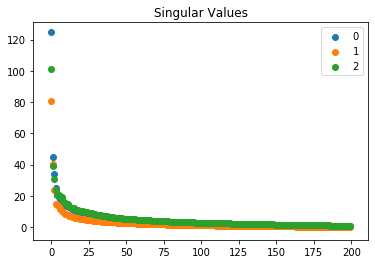

In [3]:
# Plot the singular values of matrices whose columns 
# are the vectors from a single class only 
_, sigma_0, _ = lin.svd(X[:,:200])
_, sigma_1, _ = lin.svd(X[:,200:400])
_, sigma_2, _ = lin.svd(X[:,400:600])

plt.scatter(np.arange(200),sigma_0,label='0')
plt.scatter(np.arange(200),sigma_1,label='1')
plt.scatter(np.arange(200),sigma_2,label='2')
plt.title('Singular Values')
plt.legend();

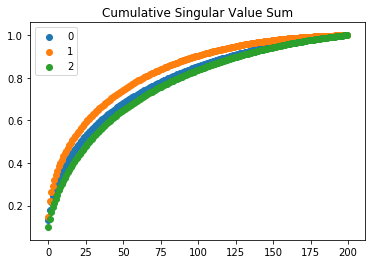

In [4]:
# See how many singular values are needed to capture 
# most of the energy in the data
sigma_0_sum = np.cumsum(sigma_0)/np.sum(sigma_0)
sigma_1_sum = np.cumsum(sigma_1)/np.sum(sigma_1)
sigma_2_sum = np.cumsum(sigma_2)/np.sum(sigma_2)

plt.scatter(np.arange(200),sigma_0_sum,label='0')
plt.scatter(np.arange(200),sigma_1_sum,label='1')
plt.scatter(np.arange(200),sigma_2_sum,label='2')
plt.title('Cumulative Singular Value Sum')
plt.legend();

In [5]:
# Split data into train, test and labels 
D, N = X.shape
X_train = np.zeros((D,N//2))
y_train = np.zeros((N//2,1))
X_test  = np.zeros((D,N//2))
y_test  = np.zeros((N//2,1))

for ii in range(10):
    jj = ii*200
    kk = ii*100
    X_train[:,kk:kk+100] = X[:,jj:jj+100]
    y_train[kk:kk+100]   = trueLabels[jj:jj+100]
    X_test[:,kk:kk+100]  = X[:,jj+100:jj+200]
    y_test[kk:kk+100]    = trueLabels[jj+100:jj+200]
    
# Train Union of Subspaces classifier
rank  = 5
Ufull = trainUoS(X_train,y_train,rank)

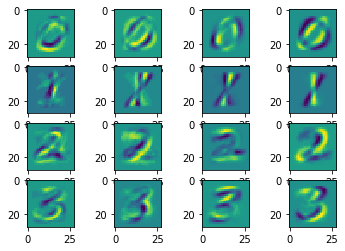

In [6]:
# Plot the first 4 principal components returned
# by classifier for a few digits
fig, axes = plt.subplots(nrows=4,ncols=4)
for ii in range(4):
    for jj in range(4):
        X_1 = Ufull[:,ii,jj].reshape(28,28)
        axes[jj,ii].imshow(X_1.T)

In [ ]:
# Nearst subspace classifier
estLabels = nsClassify(X_test,Ufull)
accuracy  = accuracy_score(y_test.squeeze(),estLabels)
print('Accuracy: %.2f'%accuracy)

In [ ]:
# Plot some of the misclassified images
errInds = np.argwhere(y_test.squeeze() != estLabels).squeeze()
np.random.shuffle(errInds)

fig, axes = plt.subplots(ncols=4,figsize=(10,4))
for ii in range(4):
    ind = errInds[ii]
    X_1 = X_test[:,ind].reshape(28,28)
    axes[ii].imshow(X_1.T)
    axes[ii].set_title('True: %d, Est: %d'%(y_test[ind], estLabels[ind]))